In [58]:
# Import packages
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [59]:
# Specify output categories for NN and path to get training/validation images
move_type = 'straight', 'right', 'left'
path = Path("Images-Marchese")

In [60]:
# Getting images from specified path
fns = get_image_files(path)
fns

(#1994) [Path('Images-Marchese/left/left_move45.png'),Path('Images-Marchese/left/00131.png'),Path('Images-Marchese/left/left_move19.png'),Path('Images-Marchese/left/left_move18.png'),Path('Images-Marchese/left/left_move59.png'),Path('Images-Marchese/left/sc126.png'),Path('Images-Marchese/left/00074.png'),Path('Images-Marchese/left/sc125.png'),Path('Images-Marchese/left/sc11.png'),Path('Images-Marchese/left/sc40.png')...]

In [61]:
lefts = (path/'left').ls().sorted()
rights = (path/'right').ls().sorted()
straights = (path/'straight').ls().sorted()
print("Straights: " + str(len(straights)))
print("Lefts: " + str(len(lefts)))
print("Rights: " + str(len(rights)))

Straights: 1218
Lefts: 279
Rights: 500


In [62]:
# Verify all images in path
failed = verify_images(fns)
failed

(#0) []

In [63]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, seed=42, item_tfms=Resize(128)) 

In [64]:
"""# Creating DataLoader object for directions
movement = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))"""

'# Creating DataLoader object for directions\nmovement = DataBlock(\n    blocks=(ImageBlock, CategoryBlock), \n    get_items=get_image_files, \n    splitter=RandomSplitter(valid_pct=0.2, seed=42),\n    get_y=parent_label,\n    item_tfms=Resize(128))'

In [65]:
"""# Checking the labeling of the images
dls = movement.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)"""

'# Checking the labeling of the images\ndls = movement.dataloaders(path)\ndls.valid.show_batch(max_n=10, nrows=2)'

In [66]:
# Training the model
learn = cnn_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.300903,0.476663,0.165829,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.707341,0.285880,0.100503,00:04
1,0.539523,0.232776,0.067839,00:04
2,0.432806,0.189507,0.067839,00:04
3,0.372889,0.170673,0.062814,00:04
4,0.332588,0.121138,0.037688,00:04
5,0.275911,0.147105,0.045226,00:04
6,0.233900,0.121343,0.042714,00:04
7,0.193341,0.112919,0.035176,00:04
8,0.162240,0.106861,0.035176,00:04
9,0.141478,0.105583,0.042714,00:04


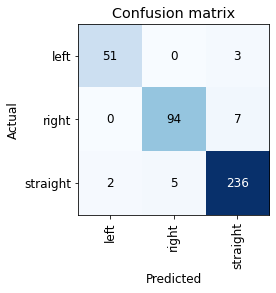

In [67]:
# Seeing where the model may have gotten confused in classification
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

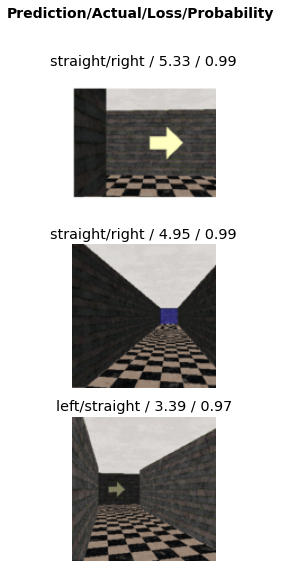

In [68]:
# Looking at the images that most confused the NN
interp.plot_top_losses(3, nrows=3)

In [69]:
# Loading in GUI that helps clean the data set
cleaner = ImageClassifierCleaner(learn)
cleaner

In [70]:
# Delete specified images in cleaner
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    
# Move specified images in cleaner
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [71]:
# Export model for future use
learn.export(os.path.abspath('Move_NN.pkl'))